# Fundamentals of returns

In [1]:
import os

import numpy as np
import pandas as pd

import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
if str(os.getcwd()).endswith("notebooks"):
    os.chdir("../")

print("Current working directory:", os.getcwd())

Current working directory: /Users/dksifoua/Developer/learning/Investment-Management


## **1. Introduction**
Returns are one of the first things investors look at when evaluating an asset.
However, **average return alone can be misleading**, because it ignores volatility and compounding effects.

**Example:**
Two assets each have an *average monthly return* of 1%, but very different volatility. After 12 months, their total values differ — showing why mean returns are not enough.

---

In [3]:
prices = pd.read_csv("./data/sample_prices.csv")
print(prices.shape)
prices.head()

(13, 2)


,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


## **2. What is a Return?**
### **Definition**
The **return** on an asset measures the gain or loss relative to its initial value over a given period.

$$
R_t = \frac{P_{t+1} - P_t}{P_t}
$$

Where:
- $P_t$ = Price at the start of period
- $P_{t+1}$ = Price at the end of period
- $R_t$ = Return over period $t$ to $t+1$ (in decimal form)

**Example:**
- Buy at \\$10, sell at \\$12:
$$
R_t = \frac{12 - 10}{10} = 0.20 \; (20\%)
$$

---

In [4]:
returns = prices.pct_change().dropna(axis=0)
returns.head()

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381


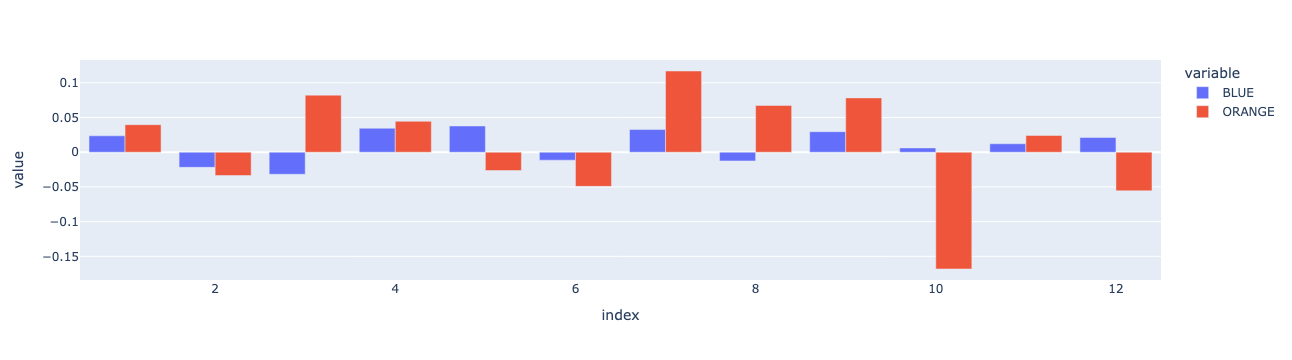

In [5]:
px.bar(returns, barmode="group")

## **3. The 1 + R Format**
Instead of working directly with $R_t$, it’s often more convenient to use:

$$
1 + R_t = \frac{P_{t+1}}{P_t}
$$

**Interpretation:**
- $R = 20\%$ → $1 + R = 1.2$  
- $R = -10\%$ → $1 + R = 0.9$

This format:
- Makes compounding easier  
- Is standard when computing long-term returns in software

---

## **4. Adjusting for Dividends**
If the asset pays dividends $D$ during the period, use **total return** instead of **price return**:

$$
R_t = \frac{P_{t+1} + D - P_t}{P_t}
$$

- **Price Return**: ignores dividends  
- **Total Return**: includes dividends (preferred for performance analysis)

**Tip:** When downloading stock index data, ensure we choose **total return** values.

---

## **5. Multi-Period Returns & Compounding**
When calculating returns over multiple periods, we **cannot** simply add percentage returns.

### **Formula:**
For two periods:
$$
(1 + R_{\text{total}}) = (1 + R_1) \times (1 + R_2)
$$
Then:
$$
R_{\text{total}} = (1 + R_1)(1 + R_2) - 1
$$

**Example:**
- Day 1: $R_1 = 10\%$ → $1.1$  
- Day 2: $R_2 = -3\%$ → $0.97$

$$
1.1 \times 0.97 = 1.067
$$
$$
R_{\text{total}} = 6.7\%
$$
(NOT 7% — due to compounding effects)

---

In [6]:
(returns + 1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

## **6. Annualizing Returns**
We annualize to compare returns over different timeframes.

### **Formula:**
If $R_{\text{period}}$ is the periodic return and $n$ is the number of periods in a year:

$$
R_{\text{annualized}} = (1 + R_{\text{period}})^n - 1
$$

**Example:**
- Monthly return: 1% → $1.01$
- Annualized:
$$
(1.01)^{12} - 1 \approx 0.1268 \; \text{or} \; 12.68\%
$$
This is **slightly higher** than simple multiplication (12%), because of compounding.

---

## **7. Key Takeaways**
- Average returns can be misleading — volatility matters.
- Use the **1 + R format** for easier computation and compounding.
- Always include **dividends** for total return calculations.
- Multi-period returns require **multiplication of 1 + R values**, not adding rates.
- Annualization uses compounding to estimate yearly returns.

---